# 코드합본

In [17]:
import math
import re
import time
from datetime import datetime, date

import requests
from bs4 import BeautifulSoup
from selenium import webdriver

from IPython.display import Image
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

from pykrx import stock
import FinanceDataReader as fdr
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import FinanceDataReader as fdr
import finterstellar as fs


import talib.abstract as ta
from talib import MA_Type


import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

pd.set_option('max_colwidth', None)
plt.rcParams['font.family']

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


['Malgun Gothic']

In [18]:
total_seoul=pd.read_csv('./datasets/total_seoul.csv')
total_seoul.shape

(795014, 28)

In [1]:
def rader_chart(sex,age,heigt,weight,bmi,체지방률):
    
    from plotly.subplots import make_subplots
    import plotly.graph_objects as go
    import plotly.offline as pyo
    
    
    
    col_list=['신장(cm)', '체중(kg)', '체지방율(%)', '허리둘레(cm)',
       'BMI(kg/㎡)','상대악력(%)', '교차윗몸일으키기(회)',
       '왕복오래달리기(회)', '스텝검사출력(VO₂max)','앉아윗몸앞으로굽히기(cm)',
       '10M_4회_왕복달리기(초)', '전신반응(초)', '제자리멀리뛰기(cm)']
    
    categories = ['신장', '체중', '체지방율',  'BMI']
    categories = [*categories, categories[0]]
    
    categories2 = ['상대악력', '교차윗몸일으키기',
       '왕복오래달리기', '스텝검사출력','앉아윗몸앞으로굽히기',
       '10M_4회_왕복달리기', '전신반응', '제자리멀리뛰기']
    categories2 = [*categories2, categories2[0]]
    
    
    나이별_mu=total_seoul[col_list][(total_seoul['성별구분코드']==sex)&(total_seoul['측정연령수']==age)].describe().iloc[1].values
    일등급_mu=total_seoul[col_list][(total_seoul['측정연령수']==age)&(total_seoul['인증구분명']==1)].describe().iloc[1].values
    이등급_mu=total_seoul[col_list][(total_seoul['측정연령수']==age)&(total_seoul['인증구분명']==2)].describe().iloc[1].values
    삼등급_mu=total_seoul[col_list][(total_seoul['측정연령수']==age)&(total_seoul['인증구분명']==3)].describe().iloc[1].values
    # 나의_mu=total_seoul[col_list][total_seoul['성별구분코드']==sex].describe().iloc[1].values
    
    

    grade1 = [나이별_mu[0],나이별_mu[1],나이별_mu[2],나이별_mu[4]]
    # grade2 = [heigt,weight,bmi,체지방률]
    grade3 = [일등급_mu[5],일등급_mu[6],일등급_mu[7],일등급_mu[8],일등급_mu[9],일등급_mu[10],일등급_mu[11]]
    grade4 = [이등급_mu[5],이등급_mu[6],이등급_mu[7],이등급_mu[8],이등급_mu[9],이등급_mu[10],이등급_mu[11]]
    grade5 = [삼등급_mu[5],삼등급_mu[6],삼등급_mu[7],삼등급_mu[8],삼등급_mu[9],삼등급_mu[10],삼등급_mu[11]]
    
    
    grade1 = [*grade1, grade1[0]]
    # grade2 = [*grade2, grade2[0]]
    grade3 = [*grade3, grade3[0]]
    grade4 = [*grade4, grade4[0]]
    grade5 = [*grade5, grade5[0]]
    
    
    
    
    
    fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}] * 2] * 1,
                        horizontal_spacing=0.3,
                        # vertical_spacing=0.1,
                   subplot_titles=("나와 같은 연령대의 사람들은?","등급별 운동종목 평균은?"))
    

    fig.add_trace(
        go.Scatterpolar(r=grade1, theta=categories, fill='toself', name=f'{age}세 {sex}성의 평균'),

        row=1,
        col=1,
    )
    # fig.add_trace(
    #     go.Scatterpolar(r=grade2, theta=categories, fill='toself',  name='나'),
    #     row=1,
    #     col=1,
    # )
    fig.add_trace(
        go.Scatterpolar(r=grade3, theta=categories2, fill='toself',  name='1등급평균'),
        row=1,
        col=2,
    )
    fig.add_trace(
    go.Scatterpolar(r=grade4, theta=categories2, fill='toself',  name='2등급평균'),
        row=1,
        col=2,
    )
    fig.add_trace(
    go.Scatterpolar(r=grade5, theta=categories2, fill='toself',  name='3등급평균'),
        row=1,
        col=2,
    )
        
    
    fig.update_layout(
    autosize=False,
    width=900,
    height=700
    )
    fig.show()


def BMI_체지방율_계산(sex,age,heigt,weight) :
    
    bmi=round((weight/(heigt)**2)*10000,1)
    if sex=='남':
        체지방량=(1.10*weight)-(128*(weight/heigt))
    else :
        체지방량=(1.07*weight)-(128*(weight/heigt))
    체지방률=round((체지방량/weight)*100,1)
    
    if bmi < 18.5 :
        bmi_판정='저체중'
    elif bmi >=18.5 and bmi<= 22.9:
        bmi_판정='정상'
    elif bmi >=23.0 and bmi<= 24.9:
        bmi_판정='비만전단계'
    elif bmi >=25.0 and bmi <= 29.9:
        bmi_판정='1단계비만'
    elif bmi >=30.0 and bmi <= 34.9:
        bmi_판정='2단계비만'
    elif bmi >=35.0:
        bmi_판정 = '3단계비만'
    
    print(f'당신의 BMI는 {bmi}, 당신의 체지방률은 {체지방률}, 당신은 비만도는 {bmi_판정} 입니다')
    
    chart=rader_chart(sex,age,heigt,weight,bmi,체지방률)
    
    return chart

In [2]:

for i in range(1):
    sex=input('당신의 성별은? :')
    age=int(input('당신의 나이는(19-39) ? :'))
    heigt=int(input('당신의 신장은(cm) ? :'))
    weight=int(input('당신의 체중은(kg) ? :'))
    chart_view=BMI_체지방율_계산(sex,age,heigt,weight)
    word_cl=make_df_list(sex,age)
    
    print(chart_view)
    print(word_cl)
    

당신의 성별은? : 여
당신의 나이는(19-39) ? : 23
당신의 신장은(cm) ? : 170]\


ValueError: invalid literal for int() with base 10: '170]\\'

In [168]:
def rader_chart(sex,age):
    
    from plotly.subplots import make_subplots
    import plotly.graph_objects as go
    import plotly.offline as pyo
    import pandas as pd
    
    
    
    col_list=['신장(cm)', '체중(kg)', '체지방율(%)', '허리둘레(cm)',
       'BMI(kg/㎡)','상대악력(%)', '교차윗몸일으키기(회)',
       '왕복오래달리기(회)', '스텝검사출력(VO₂max)','앉아윗몸앞으로굽히기(cm)',
       '10M_4회_왕복달리기(초)', '제자리멀리뛰기(cm)']
    
    categories = ['신장', '체중', '체지방율',  'BMI']
    categories = [*categories, categories[0]]
    
    categories2 = ['상대악력', '교차윗몸일으키기',
       '왕복오래달리기', '스텝검사출력','앉아윗몸앞으로굽히기',
       '10M_4회_왕복달리기', '제자리멀리뛰기']
    categories2 = [*categories2, categories2[0]]
    
    
    나이별_mu=total_seoul[col_list][(total_seoul['성별구분코드']==sex)&(total_seoul['측정연령수']==age)].describe().iloc[1].values
    일등급_mu=total_seoul[col_list][(total_seoul['측정연령수']==age)&(total_seoul['인증구분명']==1)].describe().iloc[1].values
    이등급_mu=total_seoul[col_list][(total_seoul['측정연령수']==age)&(total_seoul['인증구분명']==2)].describe().iloc[1].values
    삼등급_mu=total_seoul[col_list][(total_seoul['측정연령수']==age)&(total_seoul['인증구분명']==3)].describe().iloc[1].values
    # 나의_mu=total_seoul[col_list][total_seoul['성별구분코드']==sex].describe().iloc[1].values
    
    

    grade1 = [나이별_mu[0],나이별_mu[1],나이별_mu[2],나이별_mu[4]]
    # grade2 = [heigt,weight,bmi,체지방률]
    grade3 = [일등급_mu[5],일등급_mu[6],일등급_mu[7],일등급_mu[8],일등급_mu[9],일등급_mu[10],일등급_mu[11]]
    grade4 = [이등급_mu[5],이등급_mu[6],이등급_mu[7],이등급_mu[8],이등급_mu[9],이등급_mu[10],이등급_mu[11]]
    grade5 = [삼등급_mu[5],삼등급_mu[6],삼등급_mu[7],삼등급_mu[8],삼등급_mu[9],삼등급_mu[10],삼등급_mu[11]]
    
    
    grade1 = [*grade1, grade1[0]]
    # grade2 = [*grade2, grade2[0]]
    grade3 = [*grade3, grade3[0]]
    grade4 = [*grade4, grade4[0]]
    grade5 = [*grade5, grade5[0]]
    

    fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}] * 2] * 1,
                        horizontal_spacing=0.3,
                        # vertical_spacing=0.1,
                   subplot_titles=("나와 같은 연령대의 사람들은?","등급별 운동종목 평균은?"))
    
    fig.add_trace(
        go.Scatterpolar(r=grade1, theta=categories, fill='toself', name=f'{age}세 {sex}성의 평균'),

        row=1,
        col=1,
    )
    fig.add_trace(
        go.Scatterpolar(r=grade3, theta=categories2, fill='toself',  name='1등급평균'),
        row=1,
        col=2,
    )
    fig.add_trace(
    go.Scatterpolar(r=grade4, theta=categories2, fill='toself',  name='2등급평균'),
        row=1,
        col=2,
    )
    fig.add_trace(
    go.Scatterpolar(r=grade5, theta=categories2, fill='toself',  name='3등급평균'),
        row=1,
        col=2,
    )
    # fig.write_image('plotly_image.png')
    
    
    fig.update_layout(
    autosize=False,
    width=1000,
    height=700
    )
    fig.show()
    # fig.write_image('plotly_image.png')
    return ""

In [165]:
# ! pip install -U kaleido

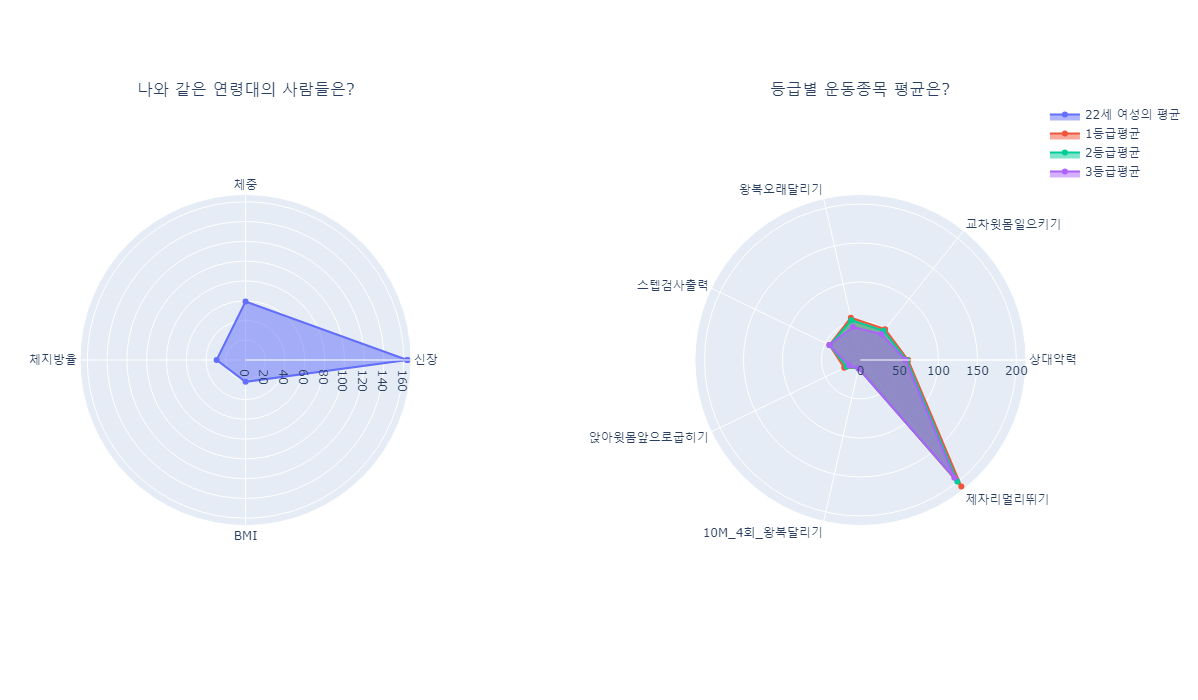

In [171]:

for i in range(1):
    sex="여" #input('당신의 성별은? :')
    age=22  #int(input('당신의 나이는(19-39) ? :'))

    rader_chart(sex,age)
    # print( type(word_cl) )
    # print(word_cl)
    

In [144]:
# from keras.preprocessing.text import Tokenizer
# from wordcloud import WordCloud
# def word_cloud_def(sex,age,grade,col_gubun): 
    
#     temp=total_seoul[(total_seoul['성별구분코드']==sex)&(total_seoul['측정연령수']==age)&(total_seoul['인증구분명']==grade)]

#     # 운동_list=[temp[],temp['본운동'],temp['마무리운동']]
#     # print(운동_list[0])
#     gen_list=[]
#     # for data in 운동_list:
#     token = Tokenizer()
#     token.fit_on_texts(temp[col_gubun])
#     wc = WordCloud(font_path='malgun', background_color="white", max_font_size=60,colormap = 'Set3')
#     gen = wc.generate_from_frequencies(token.word_docs)
#     # gen_list.append(gen)
#         # plt.imshow(gen)
        
#     plt.imshow(gen)
#     plt.savefig(f'./Plotly-World_Cloud{col_gubun}.png')
#     plt.imshow(gen_list[1])
#     plt.imshow(gen_list[2])
#     fig,ax = plt.subplots(1,3, figsize=(10,5))
#     fig.tight_layout()
    

#     ax[0].imshow(gen_list[0])
#     ax[0].set_title("준비운동")
#     ax[0].figure.savefig('./Plotly-World_Cloud1.png')

#     ax[1].imshow(gen_list[1])
#     ax[1].set_title("본운동")
#     ax[1].figure.savefig('./Plotly-World_Cloud2.png')

#     ax[2].imshow(gen_list[2])
#     ax[2].set_title("마무리운동")
#     ax[2].figure.savefig('./Plotly-World_Cloud3.png')
#     plt.figure()

#     return ""

# def make_df_list(sex,age,grade):
#     temp=total_seoul[(total_seoul['성별구분코드']==sex)&(total_seoul['측정연령수']==age)&(total_seoul['인증구분명']==grade)]
#     graph=word_cloud_def(temp)
#     return graph

In [153]:
from keras.preprocessing.text import Tokenizer
from wordcloud import WordCloud
def word_cloud_def(sex,age,grade,col_gubun): 
    
    temp=total_seoul[(total_seoul['성별구분코드']==sex)&(total_seoul['측정연령수']==age)&(total_seoul['인증구분명']==grade)]
    gen_list=[]
    token = Tokenizer()
    token.fit_on_texts(temp[col_gubun])
    wc = WordCloud(font_path='malgun', background_color="white", max_font_size=60,colormap = 'Set3', max_words=20)
    gen = wc.generate_from_frequencies(token.word_docs)
    
    plt.figure(figsize=(8,6))
    plt.axis('off')
    plt.imshow(gen)
    plt.savefig(f'./Plotly-World_Cloud{col_gubun}.png')
    return ""

In [88]:
total_seoul['인증구분명']

0         4
1         4
2         4
3         4
4         4
         ..
795009    4
795010    4
795011    4
795012    4
795013    4
Name: 인증구분명, Length: 795014, dtype: int64

당신의 성별은? : 여
당신의 나이는(19-39) ? : 23
인증구분명 : 1


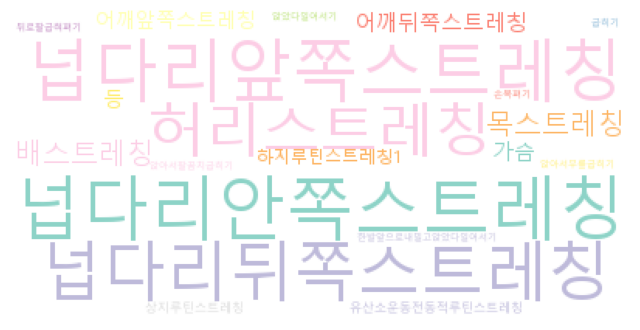

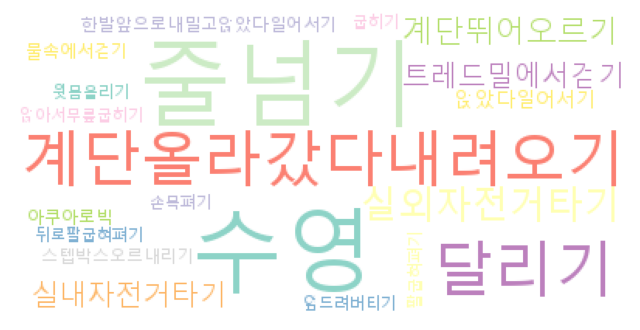

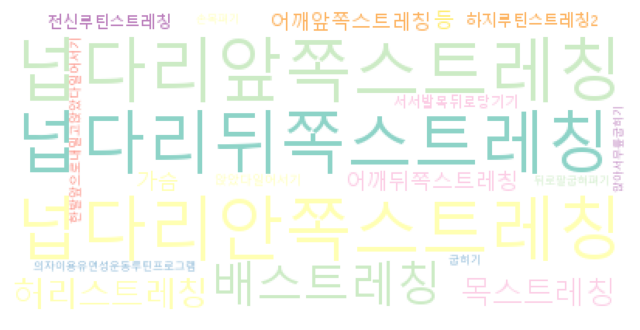

In [154]:
sex=input('당신의 성별은? :')
age=int(input('당신의 나이는(19-39) ? :'))
grade=int(input('인증구분명 :'))

col_list=['준비운동','본운동','마무리운동']
for col_gubun in col_list:
    word_cl=word_cloud_def(sex,age,grade,col_gubun)

In [30]:
ans = pd.DataFrame([[4,  4,3,  4,4,4,4,   3]], columns= ['q1', 'q2', 'q3','q4', 'q5', 'q6','q7', 'q8'])
ans

,q1,q2,q3,q4,q5,q6,q7,q8
0,4,4,3,4,4,4,4,3


20


In [ ]:
q14567 = ans['q1'] + ans['q4']+ ans['q5']+ ans['q6']+ ans['q7']
if q14567 == 20 : 
    print(1)

In [83]:

# 1,4,5,6,7 모두 4번클릭, 2,3,8 중 하나가 4번 클릭한 경우 -> 1등급
# 1,4,5,6,7 모두 3번클릭, 2,3,8 중 하나가 3번 클릭한 경우 -> 2등급
# 1,4,5,6,7 모두 2번클릭한경우 3등급
# 그 외 모두 4등급

# ans = [4,  1,4,  4,4,4,4,   3]
# ans = [4,  4,3,  4,4,4,4,   3]
# ans = [3,  1,3,  3,3,3,3,   4]
# ans = [2,  4,2,  2,2,2,2,   1]
# ans = [3,  3,1,  3,3,4,3,   3]
ans = [4,  3,1,  4,4,4,4,   2]


grade = 4
if ((ans[0] == 4) & (ans[3] == 4) & (ans[4] == 4) & (ans[5] == 4) & (ans[6] == 4))  &  ((ans[1] == 4) | (ans[2] == 4) | (ans[7] == 4))  : 
    grade = 1
elif ((ans[0] == 3) & (ans[3] == 3) & (ans[4] == 3) & (ans[5] == 3) & (ans[6] == 3))  &  ((ans[1] == 3) | (ans[2] == 3) | (ans[7] == 3))  : 
    grade  = 2
elif (ans[0] == 2) & (ans[3] == 2) & (ans[4] == 2) & (ans[5] == 2) & (ans[6] == 2) : 
    grade = 3
    
print(grade)    
    

4


In [87]:
a = " 1,1,1,1,1,1,1,4,"
arr = a[:-1].split(",")
arr

[' 1', '1', '1', '1', '1', '1', '1', '4']

In [106]:
! pip install plotly_wordcloud

ERROR: Could not find a version that satisfies the requirement plotly_wordcloud (from versions: none)
ERROR: No matching distribution found for plotly_wordcloud

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [105]:
from plotly_wordcloud import plotly_wordcloud as pwc
from plotly.offline import plot
text = "Wikipedia was launched on January 15, 2001, by Jimmy Wales and Larry Sanger.[10] Sanger coined its name,[11][12] as a portmanteau of wiki[notes 3] and 'encyclopedia'. Initially an English-language encyclopedia, versions in other languages were quickly developed. With 5,748,461 articles,[notes 4] the English Wikipedia is the largest of the more than 290 Wikipedia encyclopedias. Overall, Wikipedia comprises more than 40 million articles in 301 different languages[14] and by February 2014 it had reached 18 billion page views and nearly 500 million unique visitors per month.[15] In 2005, Nature published a peer review comparing 42 science articles from Encyclopadia Britannica and Wikipedia and found that Wikipedia's level of accuracy approached that of Britannica.[16] Time magazine stated that the open-door policy of allowing anyone to edit had made Wikipedia the biggest and possibly the best encyclopedia in the world and it was testament to the vision of Jimmy Wales.[17] Wikipedia has been criticized for exhibiting systemic bias, for presenting a mixture of 'truths, half truths, and some falsehoods',[18] and for being subject to manipulation and spin in controversial topics.[19] In 2017, Facebook announced that it would help readers detect fake news by suitable links to Wikipedia articles. YouTube announced a similar plan in 2018." 
plot(pwc(text))

ModuleNotFoundError: No module named 'plotly_wordcloud'